# Multiple_Linear_Regression_Bike_Sharing_Assignment

    Submitted by Ashutosh Gole

Problem Statement:

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario.In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

***The company wants to know:***

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

***Goal:***
- Develop a model to find the variables which are significant the demand for shared bikes with the available independent variables.
- It will be used by the management to understand and manipulate the business strategy to meet the demand levels and meet the customer's expectations.

## Step 1: Importing Libraries

In [1]:
# imporitng the required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings

warnings.filterwarnings("ignore")

## Step 2: Reading Dataset and Understanding Data

### Inspecting The Dataframe

In [2]:
# Read the csv file using pandas
bikeSharing_data = pd.read_csv("day.csv")

In [3]:
# Inspect first 5 rows
bikeSharing_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
# check the shape
bikeSharing_data.shape

(730, 16)

In [5]:
# check dataframe for null and datatype
bikeSharing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
# check the details of numeriacl data
bikeSharing_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
# check the size of data
bikeSharing_data.size

11680

In [8]:
# check the columns of data
bikeSharing_data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [9]:
# check the axes of data
bikeSharing_data.axes

[RangeIndex(start=0, stop=730, step=1),
 Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
        'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
        'casual', 'registered', 'cnt'],
       dtype='object')]

In [10]:
# check the dimensions of data
bikeSharing_data.ndim

2

#### As per above operations we get :
* There are 730 rows and 16 columns in the data set. There are no null values in any of the columns.
* ther are only int,float and object types are available.
* And dataframe is 2 dimension.

## Step 3: Cleaning Data

### Drop columns that are not useful 

In [11]:
# let us introduce a days_old variable which indicates how old is the business
bikeSharing_data["days_old"] = (
    pd.to_datetime(bikeSharing_data["dteday"], format="%d-%m-%Y")
    - pd.to_datetime("01-01-2018", format="%d-%m-%Y")
).dt.days

In [12]:
# Droping instant column as it is index column which has nothing to do with target
bikeSharing_data.drop(["instant"], axis=1, inplace=True)

# Dropping dteday as we have already have month and weekday columns to work with
bikeSharing_data.drop(["dteday"], axis=1, inplace=True)

# Dropping casual and registered columnsa as as we have cnt column which is sum of the both that is the target column

bikeSharing_data.drop(["casual"], axis=1, inplace=True)
bikeSharing_data.drop(["registered"], axis=1, inplace=True)

In [13]:
# inspecting only for checking changes
bikeSharing_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days_old
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985,0
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801,1
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349,2
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562,3
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600,4


In [14]:
print(bikeSharing_data.season.value_counts())  ## in amount of value
print(
    bikeSharing_data.season.value_counts(normalize=True)
)  ##  to see in percentage format

3    188
2    184
1    180
4    178
Name: season, dtype: int64
3    0.257534
2    0.252055
1    0.246575
4    0.243836
Name: season, dtype: float64


In [15]:
print(bikeSharing_data.weathersit.value_counts())  ## in amount of value
print(
    bikeSharing_data.weathersit.value_counts(normalize=True)
)  ##  to see in percentage format

1    463
2    246
3     21
Name: weathersit, dtype: int64
1    0.634247
2    0.336986
3    0.028767
Name: weathersit, dtype: float64


### Handle Missing values

In [16]:
# checking is ther any null values
bikeSharing_data.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
days_old      0
dtype: int64

as per above operation we can see there isnt any null value

### Handle Outliers

In [17]:
# Checking number of unique values in all columns
bikeSharing_data.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
days_old      730
dtype: int64

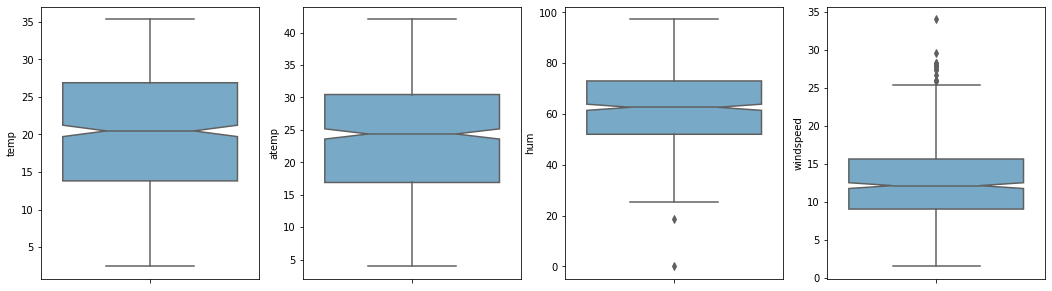

In [18]:
# Draw box plots for indepent variables with continuous values
columns = ["temp", "atemp", "hum", "windspeed"]
plt.figure(figsize=(18, 5))

i = 1
for column in columns:
    plt.subplot(1, 4, i)
    sns.boxplot(y=column, data=bikeSharing_data, palette="Blues", notch=True)
    i += 1

## Step 4 : Data Exploration

#### Bikeshares for weekend vs weekdays

<AxesSubplot:ylabel='cnt'>

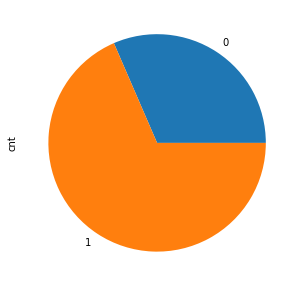

In [19]:
plt.figure(figsize=(5, 5))
bikeSharing_data.groupby(["workingday"])["cnt"].sum().plot.pie()

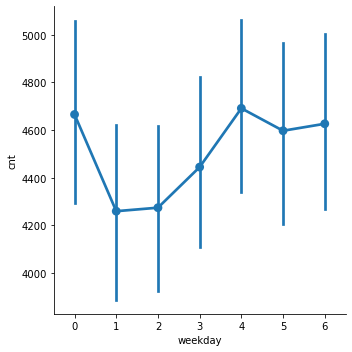

In [20]:
g = sns.factorplot(data=bikeSharing_data, x="weekday", y="cnt", ci=95)


The plot uses the workingday column to get information about weekday or weekend. Clearly lot more bikeshares happen on weekdays as compared to weekends.

Also, on a more detailed level the factor plot is plotted to see the variations in bikeshares based on the day of the week.

The factor plot reaffirms our observation from the pie chart and tells us that during weekends Sunday sees the least number of bikeshares.

### Bikeshares during different weather conditions

In [21]:
bikeSharing_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days_old
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985,0
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801,1
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349,2
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562,3
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600,4


### Bikeshares during different weather conditions

<AxesSubplot:ylabel='cnt'>

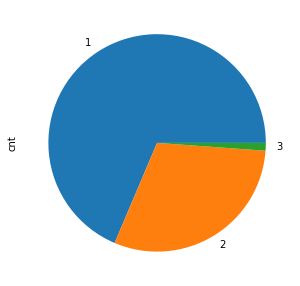

In [22]:
plt.figure(figsize=(5, 5))
bikeSharing_data.groupby(["weathersit"])["cnt"].sum().plot.pie()

The plot below shows that most bikeshares happen when the weather is Good. People also seem to be using bikeshares in Moderate weather conditions. Quite intuitively, the number of bikeshares on a bad day is quite less.

### Bikeshares during different seasons

<AxesSubplot:ylabel='cnt'>

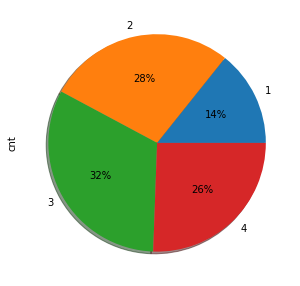

In [23]:
plt.figure(figsize=(5, 5))
bikeSharing_data.groupby(["season"])["cnt"].sum().plot.pie(
    shadow=True, autopct="%1.0f%%"
)

Firstly a pie chart is plotted for visualizing the number of bikeshares in different seasons. The pie chart doesn’t provide a clear picture so next a bar chart is used to get a clearer picture.

The bar chart shows that most bikeshares happen during Fall while Spring accounts for the least number of bikeshares.

<AxesSubplot:xlabel='season'>

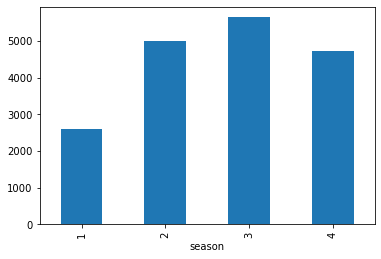

In [24]:
bikeSharing_data.groupby("season")["cnt"].mean().plot.bar()

## Step 5 : EDA

### Binning of continuous variables

In [25]:
bikeSharing_data.season.replace(
    {1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"}, inplace=True
)

bikeSharing_data.weathersit.replace(
    {1: "Good", 2: "Moderate", 3: "Bad", 4: "Severe"}, inplace=True
)

bikeSharing_data.mnth = bikeSharing_data.mnth.replace(
    {
        1: "January",
        2: "February ",
        3: "March",
        4: "April",
        5: "May",
        6: "Jun",
        7: "Jul",
        8: "August",
        9: "September",
        10: "October t",
        11: "November",
        12: "December",
    }
)

bikeSharing_data.weekday = bikeSharing_data.weekday.replace(
    {0: "sun", 1: "mon", 2: "tue", 3: "wed", 4: "thu", 5: "fri", 6: "sat"}
)
bikeSharing_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days_old
0,Spring,0,January,0,mon,1,Moderate,14.110847,18.18125,80.5833,10.749882,985,0
1,Spring,0,January,0,tue,1,Moderate,14.902598,17.68695,69.6087,16.652113,801,1
2,Spring,0,January,0,wed,1,Good,8.050924,9.47025,43.7273,16.636703,1349,2
3,Spring,0,January,0,thu,1,Good,8.200000,10.60610,59.0435,10.739832,1562,3
4,Spring,0,January,0,fri,1,Good,9.305237,11.46350,43.6957,12.522300,1600,4


###  Draw pair Plots to check the linear relationship

<Figure size 1080x2160 with 0 Axes>

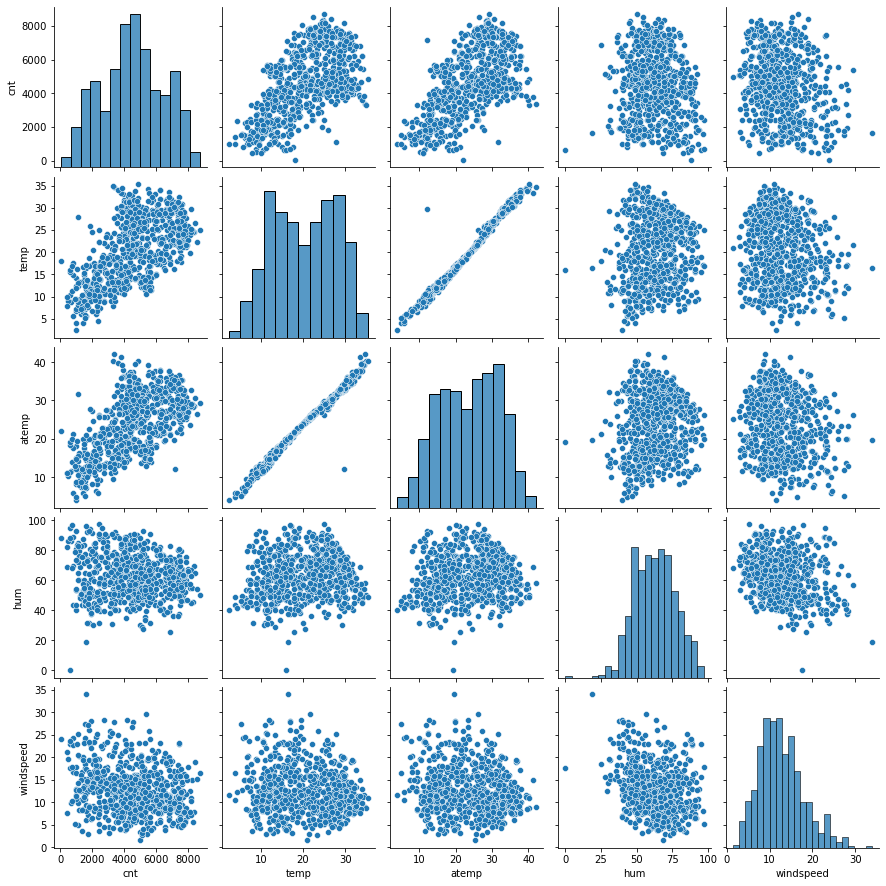

In [26]:
# Draw pairplots for continuous numeric variables using seaborn
plt.figure(figsize=(15, 30))
sns.pairplot(data=bikeSharing_data, vars=["cnt", "temp", "atemp", "hum", "windspeed"])
plt.show()

 Points:
* Looks like the temp and atemp has the highest corelation with the target variable cnt
* temp and atemp are highly co-related with each other
#### As seen from the correlation map, output variable has a linear relationship with variables like temp, atemp. 

### Visualising the Data to Find the Correlation between the Numerical Variable

<Figure size 1440x1080 with 0 Axes>

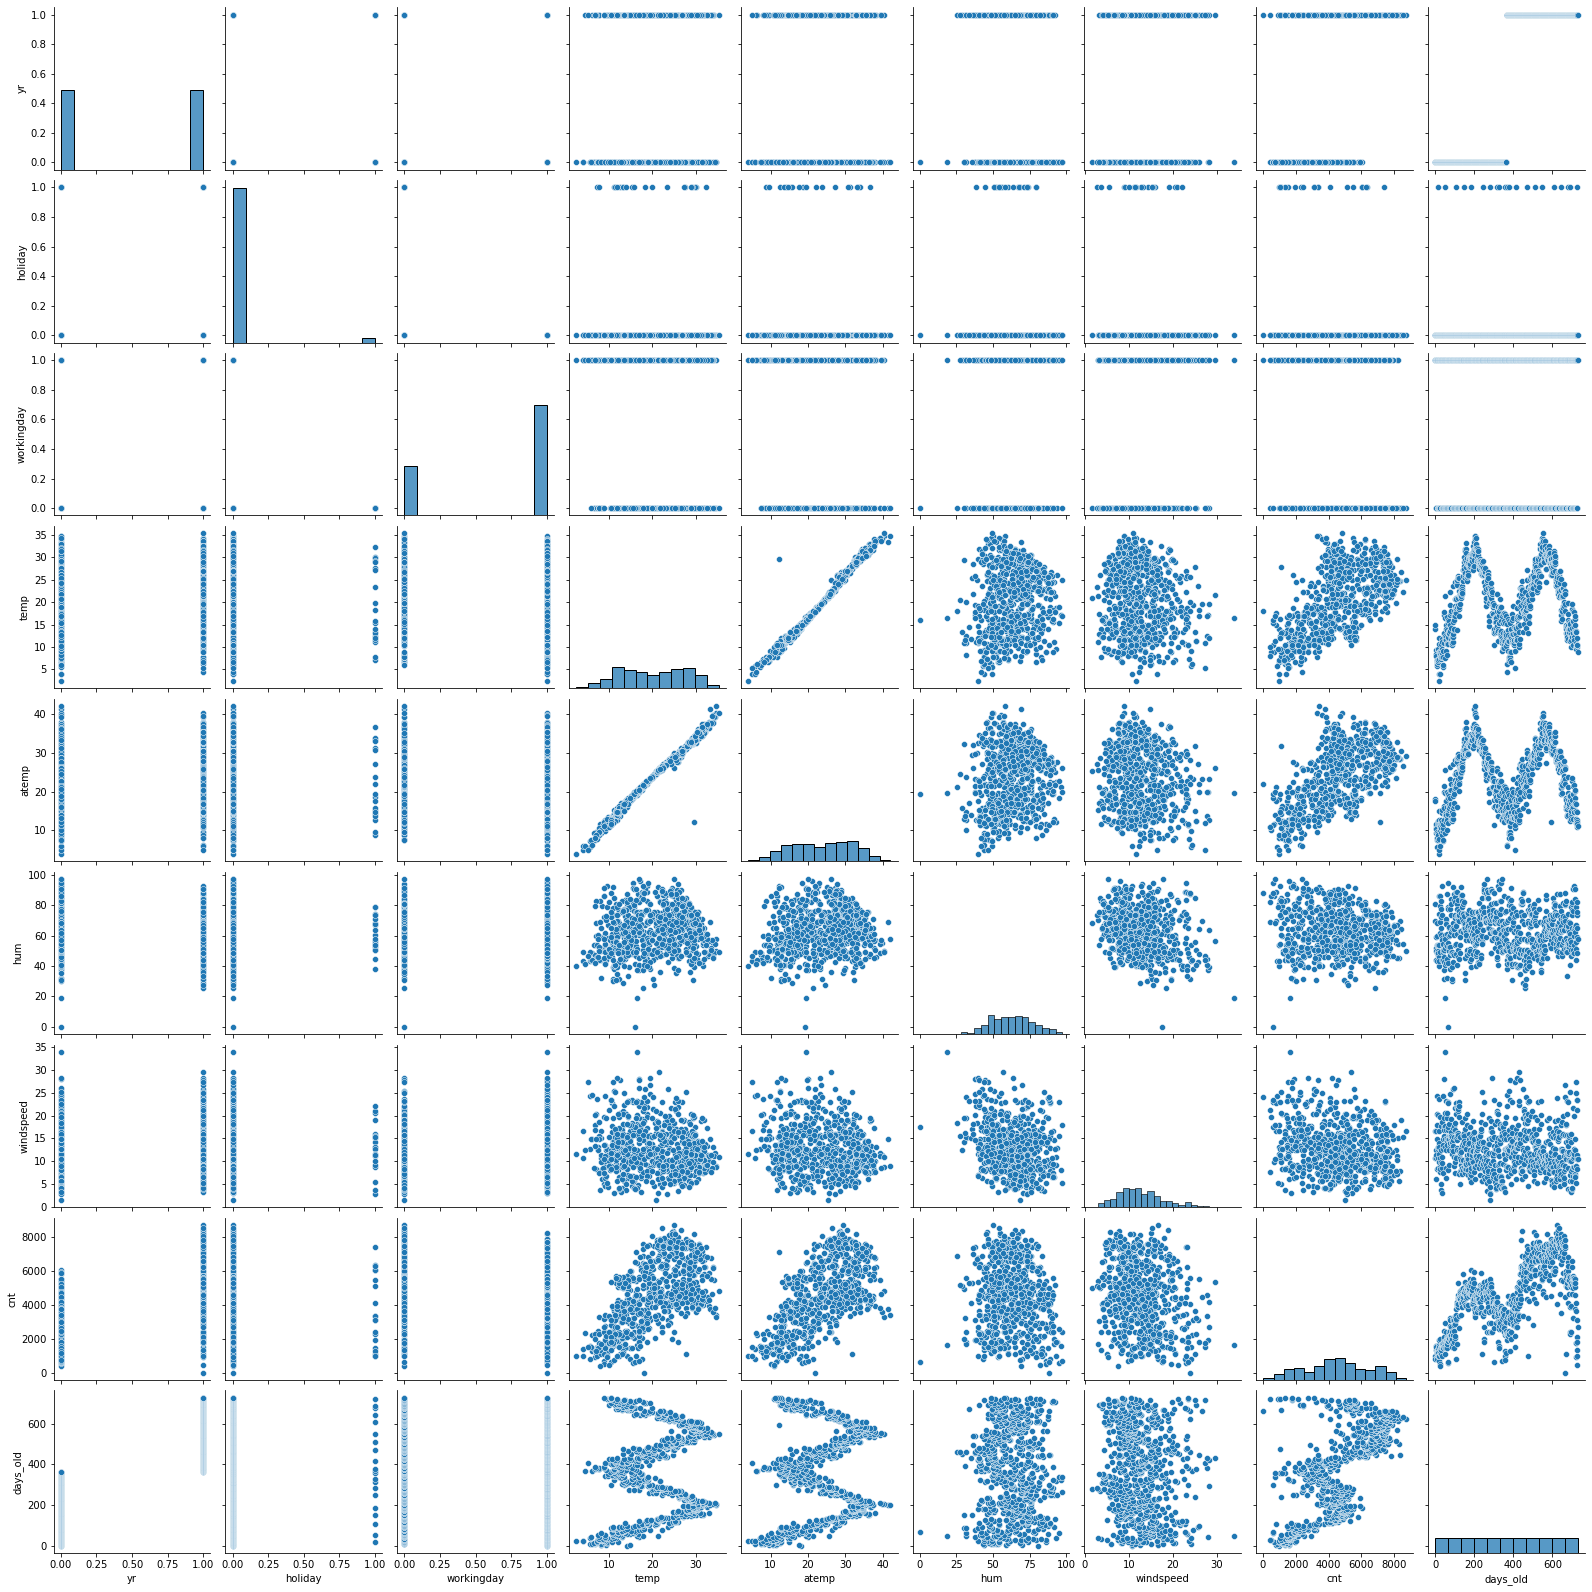

In [27]:
plt.figure(figsize=(20, 15))
sns.pairplot(bikeSharing_data)
plt.show()

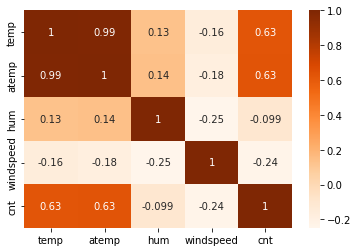

In [28]:
# Checking continuous variable relationship
sns.heatmap(
    bikeSharing_data[["temp", "atemp", "hum", "windspeed", "cnt"]].corr(),
    cmap="Oranges",
    annot=True,
)
plt.show()

#### Here we see that temp and atemp has correlation as .99 means almost 1 (highly correlated).

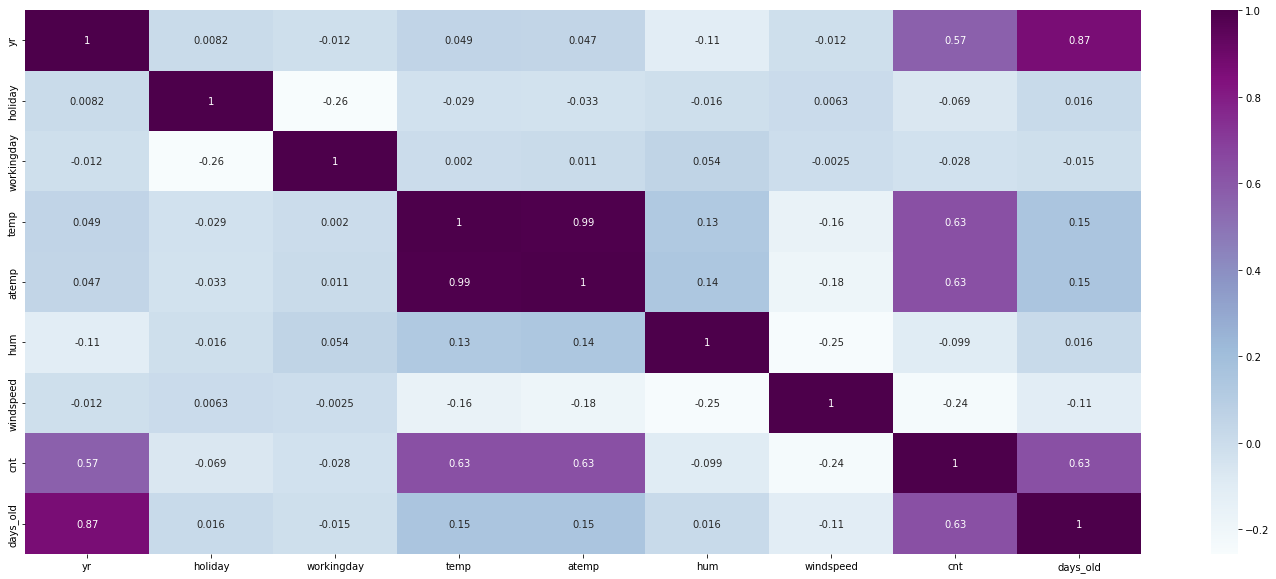

In [29]:
# Correlations for numeric variables
cor = bikeSharing_data.corr()
plt.figure(figsize=(25, 10))

sns.heatmap(cor, cmap="BuPu", annot=True)
plt.show()

#### From the correlation map, temp, atemp and days_old seems to be highly correlated and only should variable can be considered for the model. However let us elminate it based on the Variance Inflation Factor later during the model building.
#### We also see Target variable has a linear relationship with some of the  indeptendent variables. Good sign for building a linear regression Model.

### Analysing Categorical Variabels with target variables 

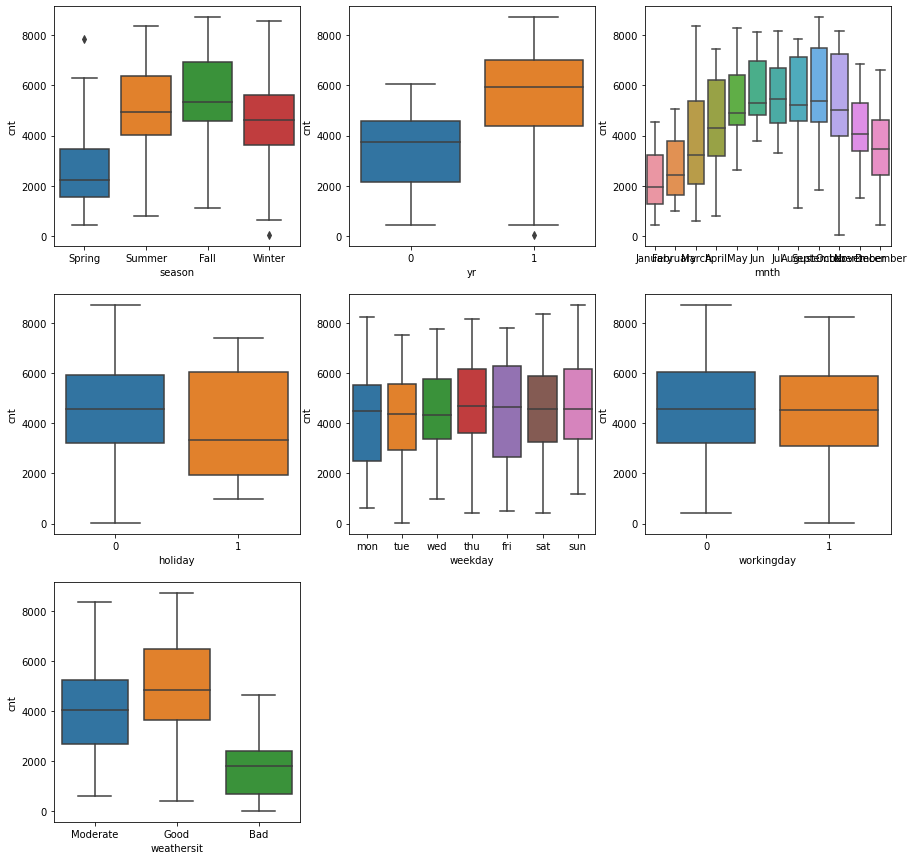

In [30]:
# Boxplot for categorical variables
vars_cat = ["season", "yr", "mnth", "holiday", "weekday", "workingday", "weathersit"]
plt.figure(figsize=(15, 15))
for i in enumerate(vars_cat):
    plt.subplot(3, 3, i[0] + 1)
    sns.boxplot(data=bikeSharing_data, x=i[1], y="cnt")
plt.show()

points:
       
    1. Season: 3:fall has highest demand for rental bikes
    2. I see that demand for next year has grown
    3. Demand is continuously growing each month till June. September month has highest demand. After September, demand is        decreasing
    4. When there is a holiday, demand has decreased.
    5. Weekday is not giving clear picture abount demand.
    6. The clear weathershit has highest demand
    7. During September, bike sharing is more. During the year end and beginning, it is less, could be due to extereme            weather conditions.

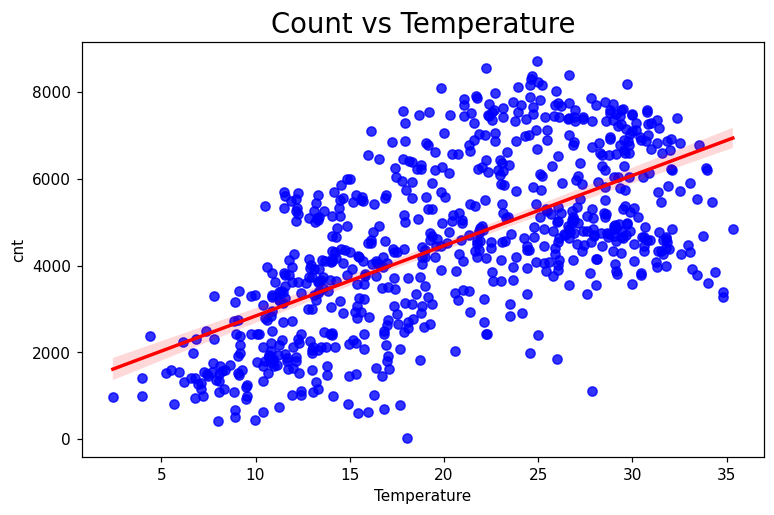

In [31]:
plt.figure(figsize=(8, 5), dpi=110)
plt.title("Count vs Temperature", fontsize=18)
sns.regplot(
    data=bikeSharing_data,
    y="cnt",
    x="temp",
    scatter_kws={"color": "blue"},
    line_kws={"color": "red"},
)
plt.xlabel("Temperature")
plt.show()

Demand for bikes is positively correlated to temperature means cnt is linearly increasing with temp indicating linear relation.

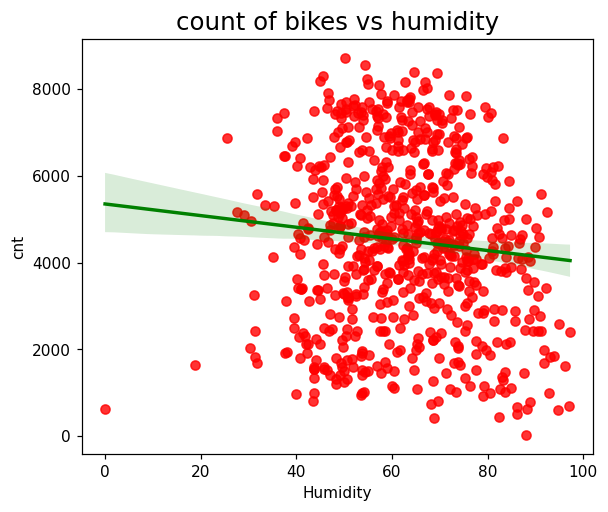

In [32]:
plt.figure(figsize=(6, 5), dpi=110)
plt.title("count of bikes vs humidity", fontsize=16)
sns.regplot(
    data=bikeSharing_data,
    y="cnt",
    x="hum",
    scatter_kws={"color": "red"},
    line_kws={"color": "green"},
)
plt.xlabel("Humidity")
plt.show()

we can see cnt decreasing with increase in humidity.cause of increasing of humidity tends to decreasing of bike sharing.

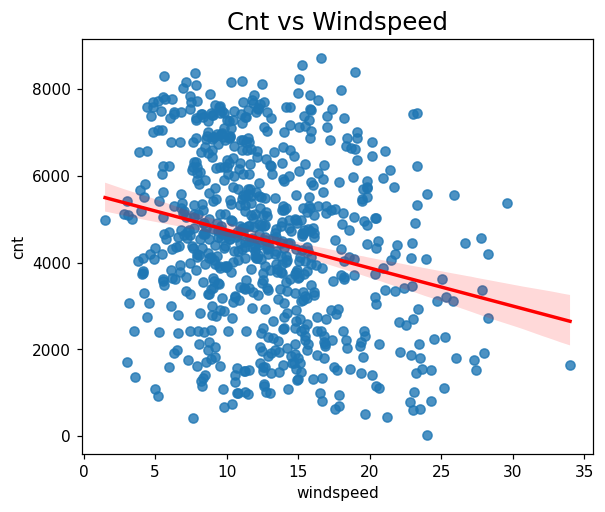

In [33]:
plt.figure(figsize=(6, 5), dpi=110)
plt.title("Cnt vs Windspeed", fontsize=16)
sns.regplot(data=bikeSharing_data, y="cnt", x="windspeed", line_kws={"color": "red"})
plt.show()

we can see cnt decreasing with increase in windspeed.cause of increasing of windspeed tends to decreasing of count bike sharing.

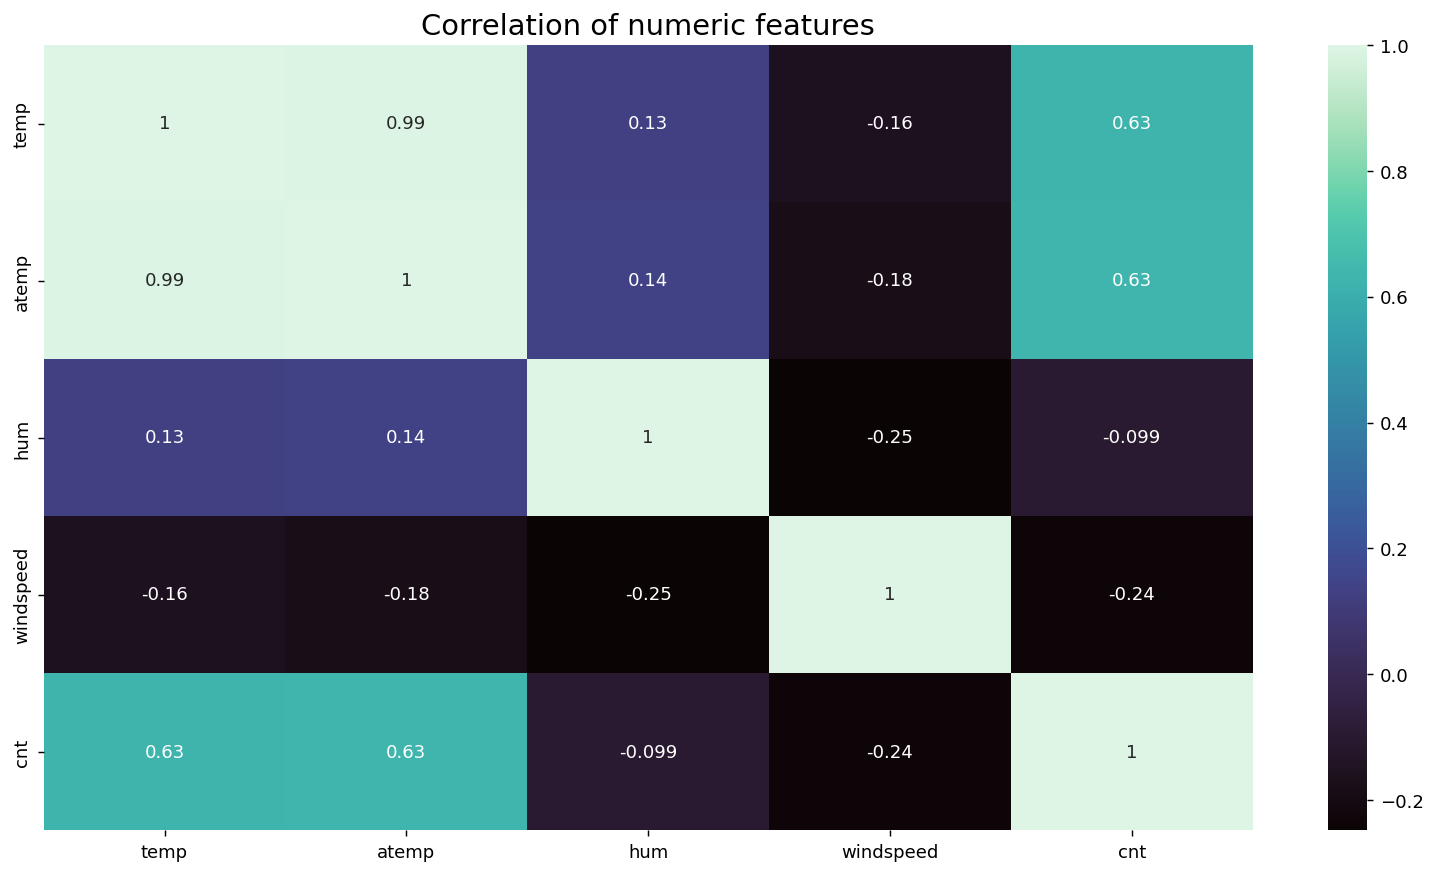

In [34]:
num_features = ["temp", "atemp", "hum", "windspeed", "cnt"]
plt.figure(figsize=(15, 8), dpi=130)
plt.title("Correlation of numeric features", fontsize=16)
sns.heatmap(bikeSharing_data[num_features].corr(), annot=True, cmap="mako")
plt.show()

points:
- Temp and Atemp are highly correlated, we can take an action to remove one of them, but lets keep them for further analysis.
- Temp and Atemp also have high correlation with cnt variable.

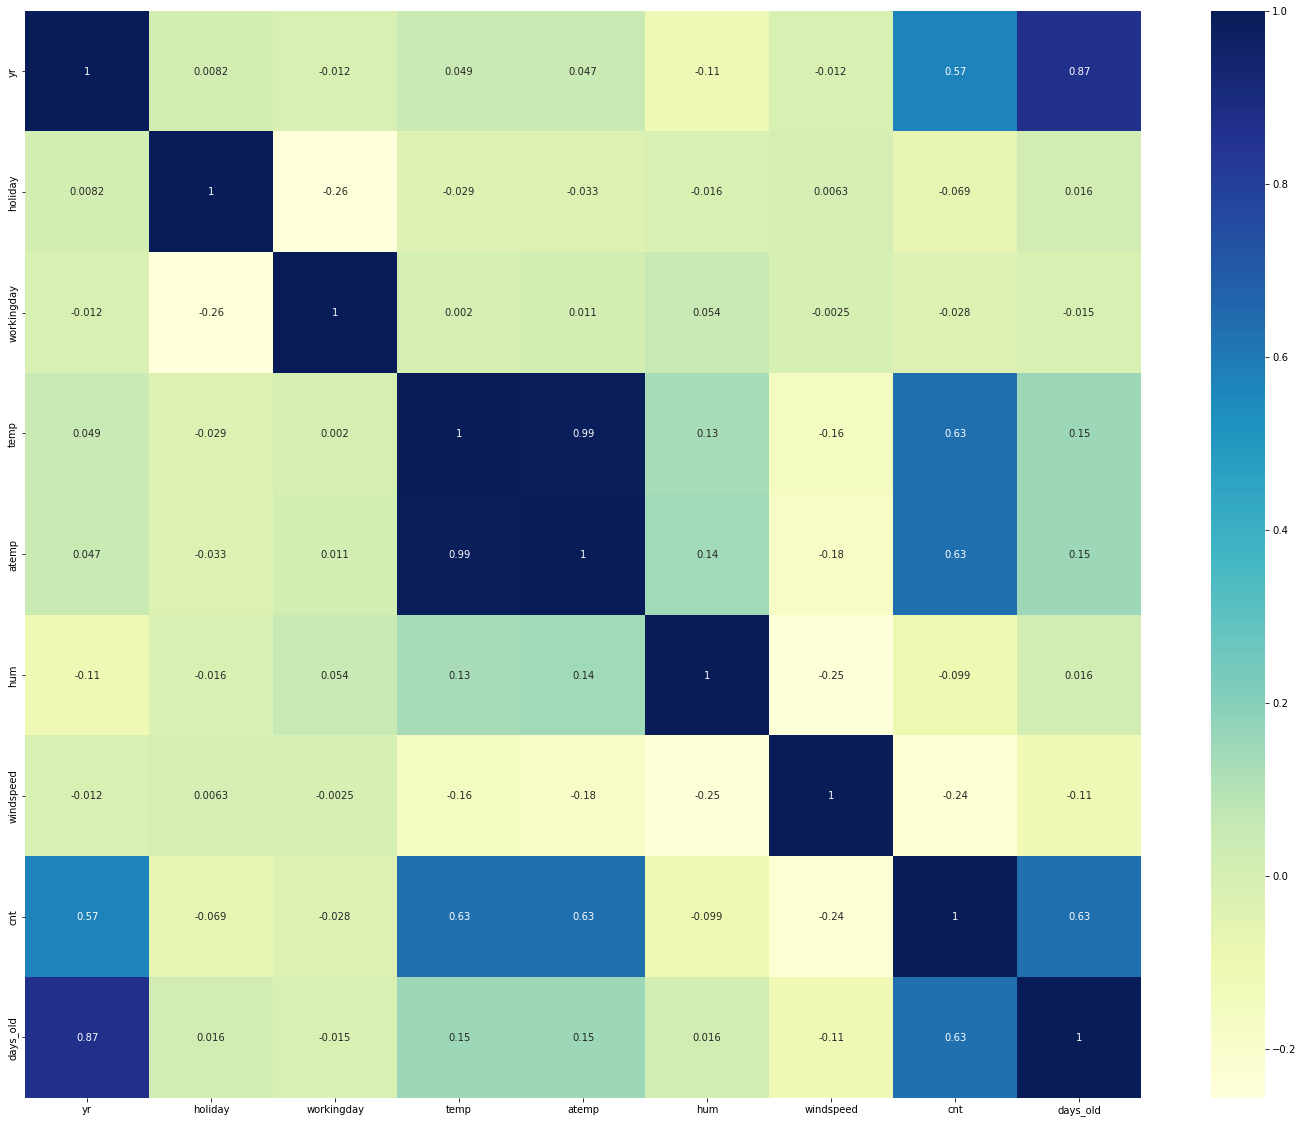

In [35]:
# Let's check the correlation coefficients to see which variables are highly correlated. Note:
# here im considering only those variables (dataframe: bikeSharing_data) that were chosen for analysis

plt.figure(figsize=(25, 20))
sns.heatmap(bikeSharing_data.corr(), annot=True, cmap="YlGnBu")
plt.show()

The heatmap clearly shows which all variable are multicollinear in nature, and which variable have high collinearity with the target variable. - We will refer this map back-and-forth while building the linear model so as to validate different correlated values along with VIF & p-value, for identifying the correct variable to select/eliminate from the model.

# Step 6: Data Preparation for Linear Regression 

In [36]:
# Subset of all categorical variables
bikeSharing_categorical = bikeSharing_data.select_dtypes(include=["object"])

__Dummy Variables__

The Variable season,mnth,weekday and weathersit have different levels. We need to convert these levels into integers.

In [37]:
# Convert into dummies

Bike_dummies = pd.get_dummies(bikeSharing_categorical, drop_first=True)
Bike_dummies.head()

,season_Spring,season_Summer,season_Winter,mnth_August,mnth_December,mnth_February,mnth_January,mnth_Jul,mnth_Jun,mnth_March,...,mnth_October t,mnth_September,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Good,weathersit_Moderate
0,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [38]:
# Drop categorical variables columns

bikeSharing_data = bikeSharing_data.drop(list(bikeSharing_categorical.columns), axis=1)

In [39]:
# Concatenate dummy variables with Original Dataframe
bikeSharing_data = pd.concat([bikeSharing_data, Bike_dummies], axis=1)

In [40]:
bikeSharing_data.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,days_old,season_Spring,...,mnth_October t,mnth_September,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Good,weathersit_Moderate
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,0,1,...,0,0,1,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,1,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,2,1,...,0,0,0,0,0,0,0,1,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,3,1,...,0,0,0,0,0,1,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,4,1,...,0,0,0,0,0,0,0,0,1,0


# Step 7: Model Building

In [41]:
# y to contain only target variable
y = bikeSharing_data.pop("cnt")

# X is all remainign variable also our independent variables
X = bikeSharing_data

# Train Test split with 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [42]:
# Inspect independent variables
X.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,days_old,season_Spring,season_Summer,...,mnth_October t,mnth_September,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Good,weathersit_Moderate
0,0,0,1,14.110847,18.18125,80.5833,10.749882,0,1,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,1,1,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,2,1,0,...,0,0,0,0,0,0,0,1,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,3,1,0,...,0,0,0,0,0,1,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,4,1,0,...,0,0,0,0,0,0,0,0,1,0


In [43]:
# Checking shape and size for train and test
print(X_train.shape)
print(X_test.shape)

(511, 30)
(219, 30)


### Feature Scaling continuous variables

In [44]:
# Importing required library
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

In [45]:
# scale continuous variables
num_vars = ["temp", "atemp", "hum", "windspeed", "days_old"]

# Normalized scaler to scale
scaler = MinMaxScaler()

# Fit and transform training set only
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

In [46]:
# Inspect stats fro Training set after scaling
X_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,days_old,season_Spring,season_Summer,...,mnth_October t,mnth_September,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Good,weathersit_Moderate
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,...,511.00000,511.00000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,0.520548,0.027397,0.698630,0.550874,0.526518,0.654174,0.414873,0.512409,0.230920,0.258317,...,0.09002,0.09002,0.148728,0.142857,0.133072,0.135029,0.156556,0.133072,0.624266,0.346380
std,0.500067,0.163398,0.459303,0.227231,0.212976,0.143648,0.185619,0.292268,0.421834,0.438138,...,0.28649,0.28649,0.356169,0.350270,0.339986,0.342090,0.363738,0.339986,0.484786,0.476282
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354221,0.353207,0.544598,0.281934,0.254458,0.000000,0.000000,...,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.575304,0.563297,0.659940,0.384732,0.521262,0.000000,0.000000,...,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.745079,0.698389,0.756977,0.526481,0.770233,0.000000,1.000000,...,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.00000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### We will be using RFE and statsmodel method combined for optimum final model 

In [47]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [48]:
rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)

In [49]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 14),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('days_old', True, 1),
 ('season_Spring', True, 1),
 ('season_Summer', False, 12),
 ('season_Winter', True, 1),
 ('mnth_August', False, 4),
 ('mnth_December', False, 2),
 ('mnth_February ', False, 10),
 ('mnth_January', False, 6),
 ('mnth_Jul', False, 11),
 ('mnth_Jun', False, 5),
 ('mnth_March', True, 1),
 ('mnth_May', True, 1),
 ('mnth_November', False, 3),
 ('mnth_October t', True, 1),
 ('mnth_September', True, 1),
 ('weekday_mon', False, 7),
 ('weekday_sat', False, 15),
 ('weekday_sun', False, 13),
 ('weekday_thu', False, 16),
 ('weekday_tue', False, 9),
 ('weekday_wed', False, 8),
 ('weathersit_Good', True, 1),
 ('weathersit_Moderate', True, 1)]

In [50]:
columns = X_train.columns[rfe.support_]
columns

Index(['yr', 'holiday', 'temp', 'atemp', 'hum', 'windspeed', 'days_old',
       'season_Spring', 'season_Winter', 'mnth_March', 'mnth_May',
       'mnth_October t', 'mnth_September', 'weathersit_Good',
       'weathersit_Moderate'],
      dtype='object')

In [51]:
X_train.columns[~rfe.support_]

Index(['workingday', 'season_Summer', 'mnth_August', 'mnth_December',
       'mnth_February ', 'mnth_January', 'mnth_Jul', 'mnth_Jun',
       'mnth_November', 'weekday_mon', 'weekday_sat', 'weekday_sun',
       'weekday_thu', 'weekday_tue', 'weekday_wed'],
      dtype='object')

In [52]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[columns]

In [53]:
X_train_rfe.columns

Index(['yr', 'holiday', 'temp', 'atemp', 'hum', 'windspeed', 'days_old',
       'season_Spring', 'season_Winter', 'mnth_March', 'mnth_May',
       'mnth_October t', 'mnth_September', 'weathersit_Good',
       'weathersit_Moderate'],
      dtype='object')

# Step 8:  Build Model 

### Model 1 

In [54]:
# Check for the VIF values of the feature variables.

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif["Features"] = X_train_rfe.columns
vif["VIF"] = [
    variance_inflation_factor(X_train_rfe.values, i)
    for i in range(X_train_rfe.shape[1])
]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
3,atemp,1259.16
2,temp,1207.57
6,days_old,50.51
4,hum,22.85
0,yr,21.59
13,weathersit_Good,14.47
14,weathersit_Moderate,9.07
5,windspeed,5.66
8,season_Winter,5.33
7,season_Spring,3.61


In [55]:
# BUILDING MODEL USING STATSMODEL:
import statsmodels.api as sm

# Adding a constant variable
X_train_lm1 = sm.add_constant(X_train_rfe)

In [56]:
# Running the linear model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

In [57]:
# Let's see the summary of model
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     173.7
Date:                Tue, 31 May 2022   Prob (F-statistic):          4.14e-186
Time:                        16:00:17   Log-Likelihood:                -4123.9
No. Observations:                 511   AIC:                             8280.
Df Residuals:                     495   BIC:                             8348.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1540.6687    

### Model 2

NOTE: - Removing the variable 'atemp' based on its High p-value & High VIF ---

In [58]:
X_train_new = X_train_rfe.drop(["atemp"], axis=1)

In [59]:
# Create a dataframe of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif["Features"] = X_train_new.columns
vif["VIF"] = [
    variance_inflation_factor(X_train_new.values, i)
    for i in range(X_train_new.shape[1])
]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
5,days_old,50.42
3,hum,22.21
0,yr,21.55
2,temp,19.67
12,weathersit_Good,13.73
13,weathersit_Moderate,8.83
7,season_Winter,5.30
4,windspeed,5.19
6,season_Spring,3.58
10,mnth_October t,1.72


In [60]:
# Add a constant
X_train_lm2 = sm.add_constant(X_train_new)

# Create a first fitted model
lr2 = sm.OLS(y_train, X_train_lm2).fit()

In [61]:
# Check the parameters obtained

lr2.params

const                  1550.484282
yr                     2478.359526
holiday                -659.342087
temp                   3556.494295
hum                   -1412.031344
windspeed             -1026.362716
days_old              -1058.502394
season_Spring         -1340.629939
season_Winter           538.484705
mnth_March              478.417104
mnth_May                383.036539
mnth_October t          651.524098
mnth_September          841.260103
weathersit_Good        1853.442586
weathersit_Moderate    1389.335167
dtype: float64

In [62]:
# summary of the linear regression model obtained
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     186.0
Date:                Tue, 31 May 2022   Prob (F-statistic):          5.32e-187
Time:                        16:00:17   Log-Likelihood:                -4124.5
No. Observations:                 511   AIC:                             8279.
Df Residuals:                     496   BIC:                             8342.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1550.4843    

### Model 3

In [63]:
# Removing the variable 'hum' based on its Very High 'VIF' value.
X_train_new = X_train_new.drop(["hum"], axis=1)

In [64]:
# Add a constant
X_train_lm3 = sm.add_constant(X_train_new)

# Create a first fitted model
lr3 = sm.OLS(y_train, X_train_lm3).fit()

In [65]:
# parameters obtained

lr3.params

const                   327.909172
yr                     2586.571053
holiday                -666.588962
temp                   3405.558342
windspeed              -776.486840
days_old              -1187.993084
season_Spring         -1386.579741
season_Winter           507.923526
mnth_March              503.189489
mnth_May                301.739644
mnth_October t          620.448392
mnth_September          771.973446
weathersit_Good        2265.379722
weathersit_Moderate    1575.924409
dtype: float64

In [66]:
# Print a summary of the linear regression model
print(lr3.summary())

# Create a dataframe of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif["Features"] = X_train_new.columns
vif["VIF"] = [
    variance_inflation_factor(X_train_new.values, i)
    for i in range(X_train_new.shape[1])
]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by="VIF", ascending=False)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     192.4
Date:                Tue, 31 May 2022   Prob (F-statistic):          2.37e-184
Time:                        16:00:17   Log-Likelihood:                -4133.5
No. Observations:                 511   AIC:                             8295.
Df Residuals:                     497   BIC:                             8354.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 327.9092    

,Features,VIF
4,days_old,47.87
0,yr,20.34
2,temp,15.43
11,weathersit_Good,13.46
12,weathersit_Moderate,7.70
3,windspeed,5.12
6,season_Winter,5.10
5,season_Spring,2.87
9,mnth_October t,1.72
8,mnth_May,1.27


### Model 4

In [67]:
# Removing the variable 'days_old' based on its Very High 'VIF' value.
X_train_new = X_train_new.drop(["days_old"], axis=1)

In [68]:
X_train_lm4 = sm.add_constant(X_train_new)

# Create a fitted model
lr4 = sm.OLS(y_train, X_train_lm4).fit()

In [69]:
# Check the parameters

lr4.params

const                   107.829511
yr                     1989.258390
holiday                -701.855588
temp                   3234.862097
windspeed              -730.834521
season_Spring         -1311.451950
season_Winter           238.010181
mnth_March              572.659672
mnth_May                361.111090
mnth_October t          686.143995
mnth_September          711.094500
weathersit_Good        2308.268773
weathersit_Moderate    1609.335370
dtype: float64

In [70]:
# Print a summary of the linear regression model
print(lr4.summary())

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif["Features"] = X_train_new.columns
vif["VIF"] = [
    variance_inflation_factor(X_train_new.values, i)
    for i in range(X_train_new.shape[1])
]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by="VIF", ascending=False)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     205.0
Date:                Tue, 31 May 2022   Prob (F-statistic):          7.21e-184
Time:                        16:00:17   Log-Likelihood:                -4137.4
No. Observations:                 511   AIC:                             8301.
Df Residuals:                     498   BIC:                             8356.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 107.8295    

,Features,VIF
10,weathersit_Good,13.24
2,temp,12.59
11,weathersit_Moderate,7.54
3,windspeed,5.10
4,season_Spring,2.86
5,season_Winter,2.66
0,yr,2.10
8,mnth_October t,1.67
7,mnth_May,1.25
9,mnth_September,1.22


### Model 5

In [71]:
# Removing the variable 'weathersit_Good' based on its Very High p-value. ---
X_train_new = X_train_new.drop(["weathersit_Good"], axis=1)

In [72]:
# Add a constant
X_train_lm5 = sm.add_constant(X_train_new)

# Create a first fitted model
lr5 = sm.OLS(y_train, X_train_lm5).fit()

In [73]:
# Print a summary of the linear regression model obtained
print(lr5.summary())

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif["Features"] = X_train_new.columns
vif["VIF"] = [
    variance_inflation_factor(X_train_new.values, i)
    for i in range(X_train_new.shape[1])
]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by="VIF", ascending=False)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     174.4
Date:                Tue, 31 May 2022   Prob (F-statistic):          4.66e-163
Time:                        16:00:18   Log-Likelihood:                -4189.5
No. Observations:                 511   AIC:                             8403.
Df Residuals:                     499   BIC:                             8454.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2260.8443    

,Features,VIF
3,windspeed,4.71
2,temp,4.47
0,yr,2.08
5,season_Winter,1.98
4,season_Spring,1.79
8,mnth_October t,1.62
10,weathersit_Moderate,1.52
7,mnth_May,1.22
9,mnth_September,1.22
6,mnth_March,1.16


### Model 6

In [74]:
# Removing the variable 'holiday' based on its High 'p-value'.
X_train_new = X_train_new.drop(["holiday"], axis=1)

In [75]:
# Add a constant
X_train_lm6 = sm.add_constant(X_train_new)

In [76]:
# Create a first fitted model
lr6 = sm.OLS(y_train, X_train_lm6).fit()

In [77]:
# Check the parameters
lr6.params

const                  2227.352568
yr                     2029.817383
temp                   3484.592982
windspeed              -975.850089
season_Spring         -1244.020930
season_Winter           254.094751
mnth_March              499.869625
mnth_May                398.439063
mnth_October t          561.437372
mnth_September          672.929260
weathersit_Moderate    -580.817287
dtype: float64

In [78]:
# Print a summary of the linear regression model.
print(lr6.summary())

# Create a dataframe of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif["Features"] = X_train_new.columns
vif["VIF"] = [
    variance_inflation_factor(X_train_new.values, i)
    for i in range(X_train_new.shape[1])
]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by="VIF", ascending=False)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     189.0
Date:                Tue, 31 May 2022   Prob (F-statistic):          9.35e-163
Time:                        16:00:18   Log-Likelihood:                -4193.0
No. Observations:                 511   AIC:                             8408.
Df Residuals:                     500   BIC:                             8455.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2227.3526    

,Features,VIF
2,windspeed,4.70
1,temp,4.46
0,yr,2.08
4,season_Winter,1.97
3,season_Spring,1.77
7,mnth_October t,1.62
9,weathersit_Moderate,1.52
6,mnth_May,1.22
8,mnth_September,1.22
5,mnth_March,1.15


### Model 7

In [79]:
# Removing the variable 'season_Winter' based on its High 'p-value'.
X_train_new = X_train_new.drop(["season_Winter"], axis=1)

In [80]:
# Add a constant
X_train_lm7 = sm.add_constant(X_train_new)

In [81]:
# Create a first fitted model
lr7 = sm.OLS(y_train, X_train_lm7).fit()

In [82]:
# Check the parameters

lr7.params

const                  2520.402167
yr                     2035.404960
temp                   3172.808528
windspeed             -1045.726008
season_Spring         -1412.912812
mnth_March              473.361319
mnth_May                339.686497
mnth_October t          715.826513
mnth_September          688.748577
weathersit_Moderate    -583.197108
dtype: float64

In [83]:
# Print a summary of the linear regression model.
print(lr7.summary())

# Create a dataframe of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif["Features"] = X_train_new.columns
vif["VIF"] = [
    variance_inflation_factor(X_train_new.values, i)
    for i in range(X_train_new.shape[1])
]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by="VIF", ascending=False)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     208.8
Date:                Tue, 31 May 2022   Prob (F-statistic):          2.72e-163
Time:                        16:00:18   Log-Likelihood:                -4194.5
No. Observations:                 511   AIC:                             8409.
Df Residuals:                     501   BIC:                             8451.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2520.4022    

,Features,VIF
1,temp,4.42
2,windspeed,4.41
0,yr,2.03
3,season_Spring,1.67
8,weathersit_Moderate,1.50
7,mnth_September,1.21
5,mnth_May,1.20
4,mnth_March,1.15
6,mnth_October t,1.15


### Model 8

In [84]:
# Removing the variable 'mnth_May' based on its High 'p-value'.
X_train_new = X_train_new.drop(["mnth_May"], axis=1)

In [85]:
# Add a constant
X_train_lm8 = sm.add_constant(X_train_new)

In [86]:
# Create a first fitted model
lr8 = sm.OLS(y_train, X_train_lm8).fit()

In [87]:
# Check the parameters

lr8.params

const                  2544.997258
yr                     2037.176214
temp                   3212.313832
windspeed             -1046.860361
season_Spring         -1449.245619
mnth_March              448.554323
mnth_October t          664.120912
mnth_September          630.928925
weathersit_Moderate    -570.964636
dtype: float64

In [88]:
# Print a summary of the linear regression model.
print(lr8.summary())

# Create a dataframe of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif["Features"] = X_train_new.columns
vif["VIF"] = [
    variance_inflation_factor(X_train_new.values, i)
    for i in range(X_train_new.shape[1])
]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by="VIF", ascending=False)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     232.1
Date:                Tue, 31 May 2022   Prob (F-statistic):          2.80e-163
Time:                        16:00:18   Log-Likelihood:                -4197.3
No. Observations:                 511   AIC:                             8413.
Df Residuals:                     502   BIC:                             8451.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2544.9973    

,Features,VIF
2,windspeed,4.40
1,temp,4.26
0,yr,2.03
3,season_Spring,1.65
7,weathersit_Moderate,1.50
6,mnth_September,1.18
4,mnth_March,1.14
5,mnth_October t,1.13


#### This model looks good, as there seems to be VERY LOW Multicollinearity between the predictors and the p-values for all the predictors seems to be significant. For now, we will consider this as our final model (unless the Test data metrics are not significantly close to this number).

## Residual Analysis of the train data

- Error terms are normally distributed with mean zero.

In [89]:
y_train_cnt = lr8.predict(X_train_lm8)

Text(0.5, 0, 'Errors')

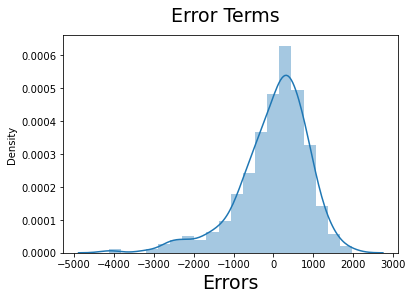

In [90]:
res = y_train - y_train_cnt

# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins=20)
fig.suptitle("Error Terms", fontsize=19)  # Plot heading
plt.xlabel("Errors", fontsize=19)  # X-label

### Insights:

- From the plot, we could see that residuals are normally distributed and our assumption for linear regression is valid

## Making Predictions Using the Final Model

- Now that we have fitted the model and checked the assumptions, it's time to go ahead and make predictions using the final model (lr8)

In [91]:
num = ["temp", "atemp", "hum", "windspeed", "workingday"]

bikeSharing_data[num] = scaler.transform(bikeSharing_data[num])

In [92]:
bikeSharing_data.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,days_old,season_Spring,season_Summer,...,mnth_October t,mnth_September,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Good,weathersit_Moderate
0,0,0,0.001372,0.355170,0.373517,0.830399,0.345784,0,1,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0.001372,0.379232,0.360541,0.717307,0.566430,1,1,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,0.001372,0.171000,0.144830,0.450603,0.565854,2,1,0,...,0,0,0,0,0,0,0,1,1,0
3,0,0,0.001372,0.175530,0.174649,0.608434,0.345408,3,1,0,...,0,0,0,0,0,1,0,0,1,0
4,0,0,0.001372,0.209120,0.197158,0.450278,0.412043,4,1,0,...,0,0,0,0,0,0,0,0,1,0


In [93]:
bikeSharing_data.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,days_old,season_Spring,season_Summer,...,mnth_October t,mnth_September,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Good,weathersit_Moderate
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,...,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.000947,0.543852,0.519090,0.646786,0.421064,364.500000,0.246575,0.252055,...,0.084932,0.082192,0.143836,0.142466,0.142466,0.142466,0.143836,0.142466,0.634247,0.336986
std,0.500343,0.167266,0.000635,0.228140,0.213968,0.146716,0.194239,210.877136,0.431313,0.434490,...,0.278971,0.274845,0.351164,0.349767,0.349767,0.349767,0.351164,0.349767,0.481971,0.473004
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.346084,0.339611,0.535852,0.281924,182.250000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.000000,0.001372,0.548307,0.535942,0.645341,0.397203,364.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,0.001372,0.743261,0.695494,0.752146,0.528055,546.750000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,0.001372,1.000000,1.000000,1.002146,1.214955,729.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [116]:
y_test = bikeSharing_data.pop("workingday")
X_test = bikeSharing_data
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   yr                   730 non-null    int64  
 1   holiday              730 non-null    int64  
 2   temp                 730 non-null    float64
 3   atemp                730 non-null    float64
 4   hum                  730 non-null    float64
 5   windspeed            730 non-null    float64
 6   days_old             730 non-null    int64  
 7   season_Spring        730 non-null    uint8  
 8   season_Summer        730 non-null    uint8  
 9   season_Winter        730 non-null    uint8  
 10  mnth_August          730 non-null    uint8  
 11  mnth_December        730 non-null    uint8  
 12  mnth_February        730 non-null    uint8  
 13  mnth_January         730 non-null    uint8  
 14  mnth_Jul             730 non-null    uint8  
 15  mnth_Jun             730 non-null    uin

In [118]:
y_test

0      0.001372
1      0.001372
2      0.001372
3      0.001372
4      0.001372
         ...   
725    0.001372
726    0.000000
727    0.000000
728    0.001372
729    0.001372
Name: workingday, Length: 730, dtype: float64

In [121]:
# Selecting the variables that were part of final model.
col1 = X_train_new.columns

X_test = X_test[col1]

# Adding constant variable to test dataframe
X_test_lm8 = sm.add_constant(X_test)

X_test_lm8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   const                730 non-null    float64
 1   yr                   730 non-null    int64  
 2   temp                 730 non-null    float64
 3   windspeed            730 non-null    float64
 4   season_Spring        730 non-null    uint8  
 5   mnth_March           730 non-null    uint8  
 6   mnth_October t       730 non-null    uint8  
 7   mnth_September       730 non-null    uint8  
 8   weathersit_Moderate  730 non-null    uint8  
dtypes: float64(3), int64(1), uint8(5)
memory usage: 26.5 KB


In [122]:
# Making predictions using the final model (lr8)

y_pred = lr8.predict(X_test_lm8)

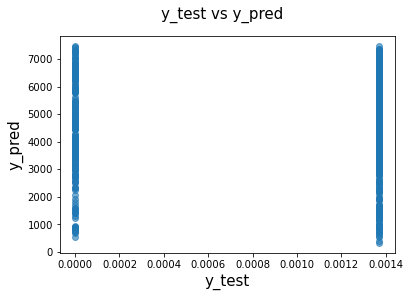

In [125]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred, alpha=0.6)
fig.suptitle("y_test vs y_pred", fontsize=15)  # Plot heading
plt.xlabel("y_test", fontsize=15)  # X-label
plt.ylabel("y_pred", fontsize=15)
plt.show()

### R^2 Value for TEST

In [129]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
r2

-56982238730284.55

### Adjusted R-Squared value Test

In [130]:
# n is number of rows in X

n = X_test.shape[0]


# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula

adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
adjusted_r2

-57614496580273.84

### _`Conclusion`_
Significant variables to predict the demand for shared bikes
- windspeed
- temp : temperature in Celsius
- hum : humidity
- yr : year
- season_Spring
- weathersit_Moderate
- mnth_September
- mnth_March
- mnth_October